# Random Resampling

In [5]:
# Import modules
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier

## Generating the features and targets dataset

In [6]:
# Generate Data
X, y = make_blobs(n_samples=[5000,50], random_state=1, cluster_std=7)
# Convert ndarray to pandas datatypes
X= pd.DataFrame(X)
y=pd.DataFrame(y)

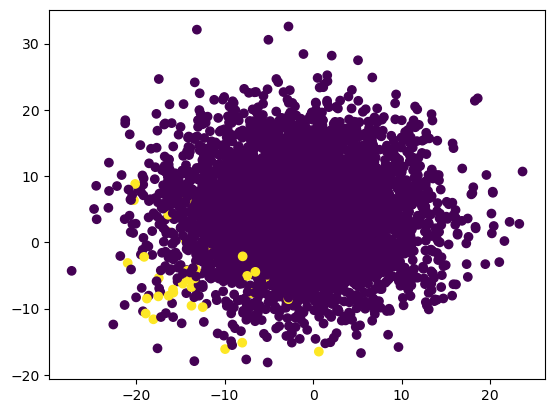

In [12]:
# Plot data
plt.scatter(
    x=X[0],
    y=X[1],
    c=y
)
plt.show()

In [13]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

In [15]:
# Count distinct values
y_train.value_counts()

0    3753
1      34
dtype: int64

---

## Random Undersampling

In [24]:
# Import RandomUnderSampler from imblearn
from imblearn.under_sampling import RandomUnderSampler
# Instantiate the RandomUnderSampler instance
rus = RandomUnderSampler(random_state=1)
# Fit the data to the model
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [25]:
# Count distinct resampled values
y_resampled.value_counts()

0    34
1    34
dtype: int64

In [8]:
# Instantiate an initial RamdonForestClassifier instance

# Fit the initial model based the training data


RandomForestClassifier()

In [9]:
# Instantiate a second RamdonForestClassifier instance

# Fit the second model based the resampled data


RandomForestClassifier()

In [10]:
# Make predictions using the initial model

# Make predictions using the model based on the resampled data


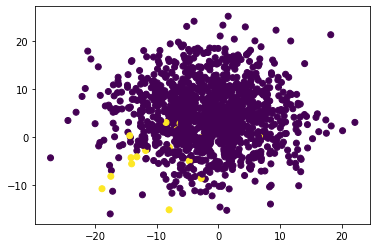

In [11]:
# Plot the data using the original y_test information


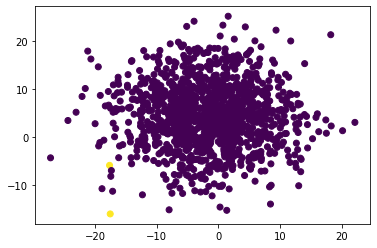

In [12]:
# Plot the data using the predictions based on the original test data


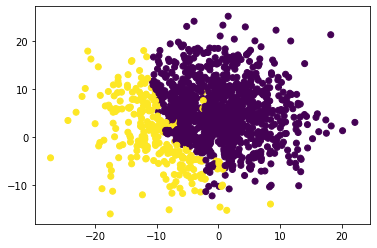

In [13]:
# Plot the data using the predictions based on the resampled test data


In [14]:
# Print classification report


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1247
           1       0.00      0.00      0.00        16

    accuracy                           0.99      1263
   macro avg       0.49      0.50      0.50      1263
weighted avg       0.97      0.99      0.98      1263

              precision    recall  f1-score   support

           0       1.00      0.81      0.89      1247
           1       0.05      0.75      0.09        16

    accuracy                           0.81      1263
   macro avg       0.52      0.78      0.49      1263
weighted avg       0.98      0.81      0.88      1263



---

## Random Oversampling

In [16]:
# Import RandomOverSampler from imblearn
from imblearn.over_sampling import RandomOverSampler
# Instantiate the RandomOverSampler instance
random_oversampler = RandomOverSampler(random_state=1)
# Fit the data to the model
X_resampled, y_resampled = random_oversampler.fit_resample(X_train, y_train)

In [17]:
# Count distinct values
y_resampled.value_counts()

0    3753
1    3753
dtype: int64

In [21]:
# Create a RandomForestClassifier instance and fit it to the original data
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)
# Create a RandomForestClassifier instance and fit it to the resampled data
model_resampled = RandomForestClassifier()
model_resampled.fit(X_resampled, y_resampled)

/var/folders/dx/8m8b_r_57793yl3byvym44sh0000gn/T/ipykernel_72490/4159383602.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/var/folders/dx/8m8b_r_57793yl3byvym44sh0000gn/T/ipykernel_72490/4159383602.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_resampled.fit(X_resampled, y_resampled)


RandomForestClassifier()

In [22]:
# Make predictions for testing features
y_pred = model.predict(X_test)
y_pred_resampled = model_resampled.predict(X_test)

In [23]:
# Print the classification reports for the two models
print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred_resampled))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1247
           1       0.00      0.00      0.00        16

    accuracy                           0.99      1263
   macro avg       0.49      0.50      0.50      1263
weighted avg       0.97      0.99      0.98      1263

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1247
           1       0.38      0.19      0.25        16

    accuracy                           0.99      1263
   macro avg       0.68      0.59      0.62      1263
weighted avg       0.98      0.99      0.98      1263

